**This Notebook implements the TensorFlow tutorial which uses SoftMax Logistic Regression on the MNIST dataset**

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import time

Import MNIST Data

In [2]:
mnist = input_data.read_data_sets("../datasets/MNIST/", one_hot=True)

Extracting ../datasets/MNIST/train-images-idx3-ubyte.gz
Extracting ../datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting ../datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../datasets/MNIST/t10k-labels-idx1-ubyte.gz


Look at sizes of training, validation and test sets
Each image is 28 X 28 pixels
Labels are in one hot encoding for use with softmax

55000
5000
10000


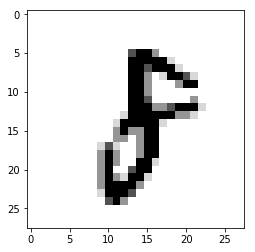

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


In [3]:
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)
plt.imshow(mnist.train.images[30].reshape(28,28),cmap="Greys")
plt.show()
print (mnist.train.labels[30])




Declare Variables

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))


Implement Model

In [5]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Define function that runs the model for given number of batches and returns the training time and accuracy on the training, validation and test data sets

In [16]:
def train_and_test_model(batches, verbose=False):
    start = time.time()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for _ in range(batches):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        train_time = time.time() - start
        train_accuracy = sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels})
        validation_accuracy = sess.run(accuracy, feed_dict={x: mnist.validation.images, y_: mnist.validation.labels})
        test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        if verbose:
            print(batches, train_time, train_accuracy, validation_accuracy, test_accuracy)
        return (train_time, train_accuracy, validation_accuracy, test_accuracy)

The tutorial runs a 1000 batches each of size 100 which is about 2 epochs with 55000 test images. Lets run the model for 1, 2 and 5 epochs and see how accuracy changes with longer training time and also record how long it takes to train.

In [17]:
one_epoch = train_and_test_model(550,verbose=True)
two_epoch = train_and_test_model(1100,verbose=True)
five_epoch = train_and_test_model(2750,verbose=True)
ten_epoch = train_and_test_model(5500,verbose=True)
twenty_epoch = train_and_test_model(11000,verbose=True)
twentyfive_epoch = train_and_test_model(13750,verbose=True)
print(one_epoch,two_epoch,five_epoch,ten_epoch,twenty_epoch,twentyfive_epoch)

550 0.670133113861084 0.912527 0.9182 0.9185
1100 1.654205083847046 0.918 0.9234 0.9185
2750 3.115687131881714 0.924782 0.9232 0.9246
5500 6.5319788455963135 0.928273 0.9262 0.9219
11000 12.81721806526184 0.927345 0.9236 0.9228
13750 15.79944109916687 0.932582 0.9256 0.9268
(0.670133113861084, 0.91252726, 0.91820002, 0.91850001) (1.654205083847046, 0.91799998, 0.92339998, 0.91850001) (3.115687131881714, 0.9247818, 0.92320001, 0.92460001) (6.5319788455963135, 0.92827272, 0.92619997, 0.92189997) (12.81721806526184, 0.92734545, 0.92360002, 0.9228) (15.79944109916687, 0.93258184, 0.92559999, 0.92680001)


Num Epochs | Train Time | Training Accuracy | Validation Accuracy | Test Accuracy
---------- | ---------- | ----------------- |-------------------- | -------------
1          | 0.6701     | 0.9125            | 0.9182              | 0.9185
2          | 1.6542     | 0.9180            | 0.9234              | 0.9185
5          | 3.1157     | 0.9248            | 0.9232              | 0.9246
10         | 6.5320     | 0.9282            | 0.9262              | 0.9219
20         | 12.8172    | 0.9273            | 0.9236              | 0.9228
25         | 15.7994    | 0.9326            | 0.9256              | 0.9268

It looks like training the model for more than 5 epochs does not improve training accuracy significantly and validation/test accuracy has plateaued. So running 5 epochs in 3.2 seconds for training and 92.5% accuracy looks like the benchmark to aim for while developing a hand coded model using numpy.
